In [5]:
%matplotlib inline
import random as rand
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

from joblib import Parallel, delayed
import multiprocessing

from IPython.display import Image, HTML


In [6]:
st.norm.ppf(.975)
st.norm.ppf(.025)

-1.9599639845400545

$\sigma$ = $\sqrt{\frac{P*(1-P)}{n}}$

z = (p - P) / σ

$H_0$ = the coin is fair

$H_a$ = the coin is un-fair


$\alpha$<br/>
$ \alpha $ = type I error (You reject the null when you shouldn't have; FP)
<br/> $\alpha$ = P(reject $H_0$| $H_0$ is true)<br/>
1 - $\alpha$ = Precision
<br/><br/>

$\beta$<br/>
$\beta$ = type II error ( you fail to reject the null when you should have; TN)<br/>
$\beta$ = P(Not rejecting $H_0$ | $H_0$ false)
<br/>
<br/>
$Power$<br/>
The probability of correctly rejecting $H_0$ when it is false is known as the power of the test. The larger it is, the better.<br/>
power = 1 - $\beta$ = Recall<br/>
power = P(rejecting $H_0$|$H_0$ false)
<br/>power  = 1 - P(Not rejecting $H_0$ | $H_0$ false)
<br/>power = P(not making type II error)

In [7]:
population = np.array([rand.randint(1, 1000) for i in range(1000000)])

In [8]:
mu = np.mean(population)
stdev = np.std(population)

In [9]:
print("True population mean is: ", round(mu, 1))
print("True population standard deviation is: ", round(stdev, 1))

True population mean is:  500.0
True population standard deviation is:  288.6


**One sample**

In [10]:
n = 10
np.mean(np.random.choice(population, size=n))

609.5

**Sampling Distribution**
<br/>
$\mu_\bar{x} = \mu$
<br/>
$\sigma_\bar{x} = {\frac{\sigma}{\sqrt{n}}}$

In [11]:
nr_of_iterations = 10000
sampling_dist_1 = []
sampling_dist_2 = []
sampling_dist_3 = []
n = 10

for i in range(nr_of_iterations):
    sampling_dist_1.append(np.mean(np.random.choice(population, size=n)))
    sampling_dist_2.append(np.mean(np.random.choice(population, size=n*10)))
    sampling_dist_3.append(np.mean(np.random.choice(population, size=n*100)))

print("statistics for n=10:")
print("mean of the sample distribution: ", np.mean(sampling_dist_1))
print("SE, std dev of the sample distribution ", np.std(sampling_dist_1)/np.sqrt(n))
print("\n")
print("statistics for n=100:")
print("mean of the sample distribution: ",np.mean(sampling_dist_2))
print("SE, std dev of the sample distribution ",np.std(sampling_dist_2)/np.sqrt(n*10))
print("\n")
print("statitics for n=1000:")
print("mean of the sample distribution: ",np.mean(sampling_dist_3))
print("SE, std dev of the sample distribution ",np.std(sampling_dist_3)/np.sqrt(n*100))

statistics for n=10:
mean of the sample distribution:  498.9634899999999
SE, std dev of the sample distribution  28.651633091361305


statistics for n=100:
mean of the sample distribution:  499.483075
SE, std dev of the sample distribution  2.9395795208403106


statitics for n=1000:
mean of the sample distribution:  499.939533
SE, std dev of the sample distribution  0.28829654560558127


/Users/wcasey/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


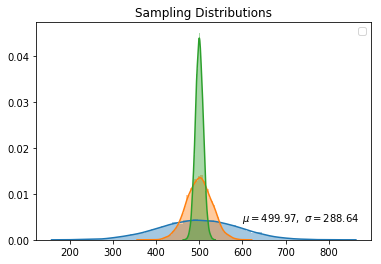

In [12]:
sns.distplot(sampling_dist_1)
sns.distplot(sampling_dist_2)
sns.distplot(sampling_dist_3)
# sns.lineplot(x=np.mean(sampling_dist_3) + st.norm.ppf(.95)*np.std(sampling_dist_3), y=[.0, .01])
# sns.lineplot(x=np.mean(sampling_dist_3) - st.norm.ppf(.95)*np.std(sampling_dist_3), y=[.0, .01])
plt.title("Sampling Distributions")
plt.text(600, .004, r'$\mu={},\ \sigma={}$'.format(round(mu, 2), round(stdev, 2)))
plt.legend()

**Confidence Interval**<br/>

$(\bar{x} - Z_{CL}*SE$ , $ \mu $ , $\bar{x} + Z_{CL}*SE)$<br/>
$SE = {\frac{\sigma}{\sqrt{n}}}$

In [13]:
def CI(sample, confidence_level = 0.95):
    sample_mean_ = np.mean(sample)
    sample_std_ = np.std(sample)
    n = len(sample)
    z_confidence_level = st.norm.ppf(confidence_level)
    CI_low = np.mean(sample) - z_confidence_level*(np.std(sample)/np.sqrt(n))
    CI_high = np.mean(sample) + z_confidence_level*(np.std(sample)/np.sqrt(n))
    return CI_low, sample_mean_, CI_high
    

In [14]:
CI(np.random.choice(population, size=10))

(223.47140463820864, 375.2, 526.9285953617914)

In [15]:
population.mean()

499.97246

291.54939547184796
305.2851943674963
280.5102104933081


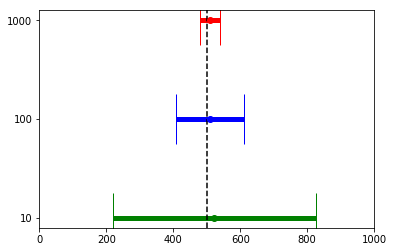

In [16]:
x10 = np.random.choice(population, size=10)
x100 = np.random.choice(population, size=100)
x1000 = np.random.choice(population, size=1000)

for x_n in [(x10, '10', 'green'), (x100, '100', 'blue'), (x1000, '1000', 'red')]:
    print(np.std(x_n[0]))
    y = np.array([x_n[1]])
    x = CI(x_n[0])[1]
    x_err = CI(x_n[0])[2] - CI(x_n[0])[0]
    plt.errorbar(x, y, xerr=x_err, fmt='o', color=x_n[2],
                 ecolor=x_n[2], elinewidth=5, capsize=25)
    
plt.xlim(left=0)
plt.xlim(right=1000)
plt.axvline(x=mu, linestyle='--', color='k')




In [17]:
class ttest_simulator:
    def __init__(self, population, effect, alpha, n):
        self.population = population
        self.effect = effect
        self.alpha = alpha
        self.n = n
        self.mu = self.population.mean()
        self.xbase = np.random.choice(self.population, size=self.n) 
        self.xvar = np.random.choice(self.population, size=self.n) + self.effect
        self.t = st.ttest_rel(self.xvar, self.xbase)
        
        
    def CI(self, sample, alpha = 0.05):
        sample_mean_ = np.mean(sample)
        sample_std_ = np.std(sample)
        n = len(sample)
        z_confidence_level = st.norm.ppf((1-self.alpha))
        
        CI_low = sample_mean_ - z_confidence_level*(sample_std_/np.sqrt(n))
        CI_high = sample_mean_ + z_confidence_level*(sample_std_/np.sqrt(n))
        return CI_low, sample_mean_, CI_high        
        

        
    def CIplot(self, **kwargs):
        variant = kwargs['variant']
        base = kwargs['base']
        
        for x_n in [(self.xvar, variant['name'], variant['color']), (self.xbase, base['name'], base['color'])]:
            
            CI_low, sample_mean_, CI_high = self.CI(sample=x_n[0], alpha=self.alpha)
            x_err = CI_high - CI_lowk
            name = x_n[1]
            color = x_n[2]
            plt.errorbar(sample_mean_, np.array([name]), xerr=x_err, fmt='o', color=color,
                         ecolor=color, elinewidth=5, capsize=25)
            
        plt.xlim(left=0)
        plt.xlim(right=1000)
        plt.axvline(x=self.mu, linestyle='--', color=base['color'])
        plt.axvline(x=self.mu+self.effect, linestyle='--', color=variant['color'])
        plt.show()
    
    def SNP(self):
        """
        The Standard Normal Distribution Plot
        with the observed t-stat
        """
        r = np.arange(-4,4,0.001)
        plt.plot(r, st.norm.pdf(r, 0, 1))
        plt.axvline(x=2, ymax=0.2,color='k')
        plt.axvline(x=-2, ymax=0.2,color='k')
        plt.plot(self.t.statistic, 0, marker='x', markersize=8,)
        plt.show()
        
        

In [19]:
a = ttest_simulator(population=population, effect = 100, n=100, alpha=0.05)
a.CIplot(base={'name': 'base', 'color': 'green'}
        , variant={'name': 'variant', 'color': 'blue'})
a.t.pvalue
a.SNP()


NameError: name 'CI_lowk' is not defined

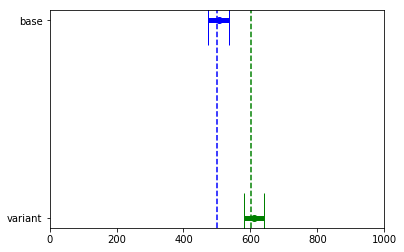

t: 8.074540422068987
pvalue: 1.937504809262742e-15
Reject


In [627]:
effect = 100
sample_size = 1000
threshold = 0.05
xvar = np.random.choice(population, size=sample_size) + effect
xbase = np.random.choice(population, size=sample_size)

for x_n in [(xvar, 'variant', 'green'), (xbase, 'base', 'blue')]:
    y = np.array([x_n[1]])
    x = CI(x_n[0])[1]
    x_err = CI(x_n[0])[2] - CI(x_n[0])[0]
    plt.errorbar(x, y, xerr=x_err, fmt='o', color=x_n[2],
                 ecolor=x_n[2], elinewidth=5, capsize=25)

    
plt.xlim(left=0)
plt.xlim(right=1000)
plt.axvline(x=mu, linestyle='--', color='blue')
plt.axvline(x=mu+effect, linestyle='--', color='green')
plt.show()

ttest = st.ttest_rel(xvar, xbase)
print("t: {}".format(ttest.statistic))
print("pvalue: {}".format(ttest.pvalue))
if ttest.pvalue < threshold:
    print("Reject")
else:
    print("Fail to Reject")
    



/Users/wcasey/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


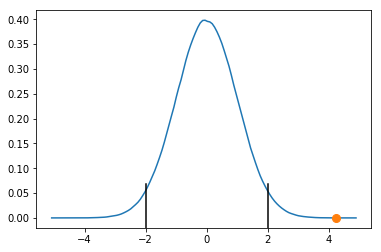

In [544]:
sns.distplot(d, hist=False)
plt.axvline(x=2, ymax=0.2,color='k')
plt.axvline(x=-2, ymax=0.2,color='k')
plt.plot(ttest.statistic, 0, marker='o', markersize=8,)

# plt.fill_between(ttest.statistic, 5)

In [546]:
def f(t):
    return t * t

In [548]:
section

array([-1.0000000e+00, -9.5000000e-01, -9.0000000e-01, -8.5000000e-01,
       -8.0000000e-01, -7.5000000e-01, -7.0000000e-01, -6.5000000e-01,
       -6.0000000e-01, -5.5000000e-01, -5.0000000e-01, -4.5000000e-01,
       -4.0000000e-01, -3.5000000e-01, -3.0000000e-01, -2.5000000e-01,
       -2.0000000e-01, -1.5000000e-01, -1.0000000e-01, -5.0000000e-02,
        8.8817842e-16,  5.0000000e-02,  1.0000000e-01,  1.5000000e-01,
        2.0000000e-01,  2.5000000e-01,  3.0000000e-01,  3.5000000e-01,
        4.0000000e-01,  4.5000000e-01,  5.0000000e-01,  5.5000000e-01,
        6.0000000e-01,  6.5000000e-01,  7.0000000e-01,  7.5000000e-01,
        8.0000000e-01,  8.5000000e-01,  9.0000000e-01,  9.5000000e-01])

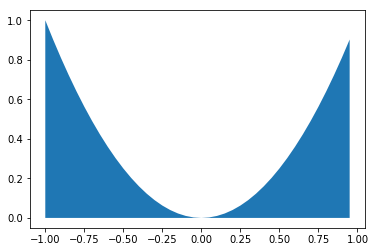

In [547]:
section = np.arange(-1, 1, 1/20.)
plt.fill_between(section,f(section))

In [354]:
d

**Why Square root of n in the denominator?**

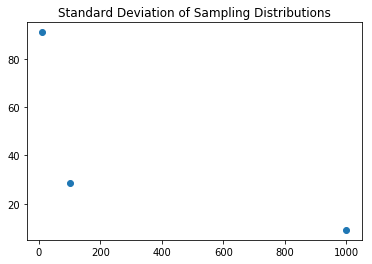

In [12]:
plt.scatter([n, n*10,n*100], [np.std(sampling_dist_1), np.std(sampling_dist_2), np.std(sampling_dist_3)])
plt.title('Standard Deviation of Sampling Distributions')
plt.show()

Text(0.5, 1.0, '10/sqrt(n)')

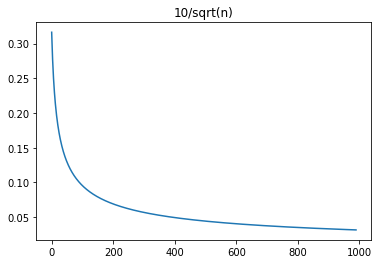

In [13]:
plt.plot([(1/np.sqrt(n)) for n in range(10, 1000)])
plt.title("10/sqrt(n)")

**Hypothesis Testing**

In [14]:
df = pd.DataFrame(columns={'z', 'p_value', 'reject_the_null', 'the_coin', 'H_count', 'H_proportion', 'T_count', 'T_proportion', 'n'})
random_coin = np.arange(.2, .9, .1).round(decimals=1)
random_coin = [.5, .75]
# random_coin = [.5]
coin_weights = {i+1:random_coin[i] for i in range(len(random_coin)) }
sig_level = .05
P = .5 #hypothesised value of the population proportion in the null hypothesis
n = 63
def CoinFlips(the_coin):
    return rand.random() > the_coin

def SimulateCoinFlips(n):
    the_coin = coin_weights[rand.randint(1, len(random_coin))]
#     the_coin = 0.5
    results = [CoinFlips(the_coin) for i in range(n)]
    result_stats = {"H_count": sum(results)
                    ,"H_proportion": sum(results)/(n)
                    , "T_count": n-sum(results)
                    ,"T_proportion": (n - sum(results))/(n)
                    , 'n': n
                   }
    sigma = np.sqrt((P*(1-P))/result_stats['n'])
    z = (result_stats['H_proportion'] - P)/sigma
    p_value = st.norm.cdf(z)
    reject_the_null = (sig_level/2 > p_value  or sig_level/2 > (1-p_value))
    stats_results_test = {'z': z, 'p_value': p_value, 'reject_the_null': reject_the_null, "the_coin": the_coin, 'result_stats': result_stats, 'sample_standard_deviation': sigma}
    return stats_results_test


for i in range(10000):
    results = SimulateCoinFlips(n)
    new_df = pd.DataFrame({'z': results['z']
                           , 'p_value': results['p_value']
                           , 'reject_the_null': results['reject_the_null']
                           , 'sample_standard_deviation': results['sample_standard_deviation']
                           , 'the_coin': results['the_coin']
                           , 'H_count': results['result_stats']['H_count']
                           , 'H_proportion': results['result_stats']['H_proportion']
                           , 'T_count': results['result_stats']['T_count']
                           , 'T_proportion': results['result_stats']['T_proportion']
                           , 'n': results['result_stats']['n']}, index=[0])
    df = pd.concat([df, new_df])
df = df.reset_index(drop=True)

/Users/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [15]:
df['unfair_coin'] = df.the_coin.apply(lambda x: 1 if x != .5 else 0)
df['fair_coin'] = df.the_coin.apply(lambda x: 1 if x == .5 else 0)
df['TP'] = df.apply((lambda x: 1 if x['reject_the_null'] == 1 and x['unfair_coin'] == 1 else 0), axis=1)
df['FP'] = df.apply((lambda x: 1 if x['reject_the_null'] == 1 and x['unfair_coin'] == 0 else 0), axis=1)
df['Type_I_error'] = df.apply((lambda x: 1 if x['reject_the_null'] == 1 and x['unfair_coin'] == 0 else 0), axis=1)
df['Type_II_error'] = df.apply((lambda x: 1 if x['reject_the_null'] == 0 and x['unfair_coin'] == 1 else 0), axis=1)

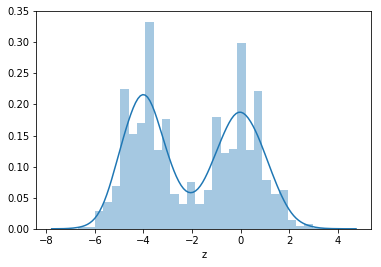

In [16]:
sns.distplot(df['z'])

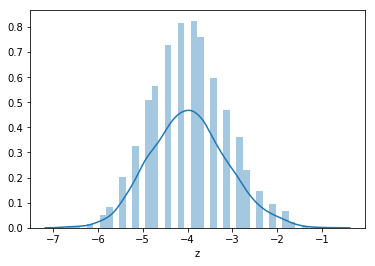

In [17]:
sns.distplot(df[df['unfair_coin'] == 1].z)

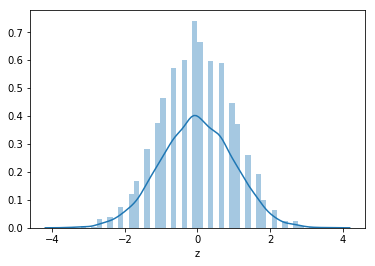

In [18]:
sns.distplot(df[df['unfair_coin'] == 0].z)

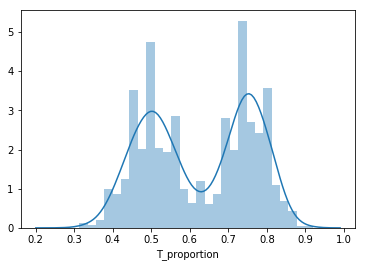

In [19]:
sns.distplot(df['T_proportion'])

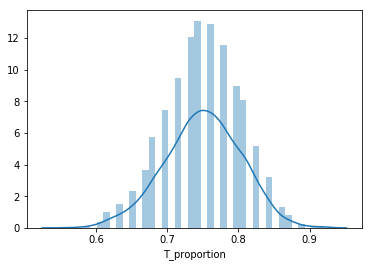

In [20]:
sns.distplot(df[df['unfair_coin'] == 1].T_proportion)

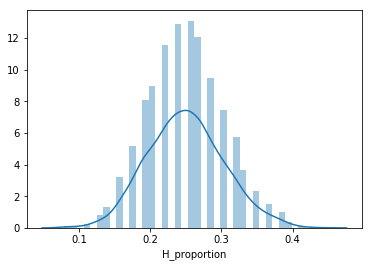

In [21]:
sns.distplot(df[df['unfair_coin'] == 1].H_proportion)

In [22]:
df[df['Type_I_error'] == 1]

,H_count,H_proportion,T_count,T_proportion,n,p_value,reject_the_null,sample_standard_deviation,the_coin,z,unfair_coin,fair_coin,TP,FP,Type_I_error,Type_II_error
12,40,0.634921,23,0.365079,63,0.983895,True,0.062994,0.5,2.141799,0,1,0,1,1,0
125,22,0.349206,41,0.650794,63,0.008338,True,0.062994,0.5,-2.393775,0,1,0,1,1,0
150,23,0.365079,40,0.634921,63,0.016105,True,0.062994,0.5,-2.141799,0,1,0,1,1,0
155,23,0.365079,40,0.634921,63,0.016105,True,0.062994,0.5,-2.141799,0,1,0,1,1,0
172,42,0.666667,21,0.333333,63,0.995925,True,0.062994,0.5,2.645751,0,1,0,1,1,0
179,42,0.666667,21,0.333333,63,0.995925,True,0.062994,0.5,2.645751,0,1,0,1,1,0
186,23,0.365079,40,0.634921,63,0.016105,True,0.062994,0.5,-2.141799,0,1,0,1,1,0
201,23,0.365079,40,0.634921,63,0.016105,True,0.062994,0.5,-2.141799,0,1,0,1,1,0
263,23,0.365079,40,0.634921,63,0.016105,True,0.062994,0.5,-2.141799,0,1,0,1,1,0
404,42,0.666667,21,0.333333,63,0.995925,True,0.062994,0.5,2.645751,0,1,0,1,1,0


In [23]:
print("n: ",  n)
print("alpha: ", df.Type_I_error.sum()/df.fair_coin.sum())
print("beta: ",  df.Type_II_error.sum()/df.unfair_coin.sum())
print("power: ", 1 - (df.Type_II_error.sum()/df.unfair_coin.sum()))

n:  63
alpha:  0.04209056453221624
beta:  0.014838580308802888
power:  0.9851614196911971


**Two Sample t test**

In [24]:
def unfair(x):
    if x <= 7:
        return x + 3
    else:
        return x

In [25]:
n = 10
W = np.array([rand.randint(1, 10) + rand.randint(1, 10) for i in range(n)])
V = np.array([rand.randint(1, 10) + unfair(rand.randint(1, 10)) for i in range(n)])
print("W: ", np.mean(W), np.std(W))
print("V: ", np.mean(V), np.std(V))

W:  11.0 4.6475800154489
V:  13.1 3.3


In [26]:
numerator = (np.average(W) - np.average(V))

In [27]:
denominator = ((np.sqrt((n -1)*np.std(W)**2) + np.sqrt((n -1)*np.std(V)**2))/(n + n - 2))*np.sqrt((1/n) + (1/n))

In [28]:
t_statistic = numerator/denominator

In [29]:
t_statistic 

-3.545035905487009

In [30]:
# t_statistic = -.5
'{:f}'.format(st.t.sf(np.abs(t_statistic), n-1)*2)

'0.006264'

<ErrorbarContainer object of 3 artists>

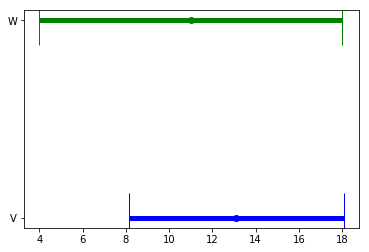

In [31]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.stats.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m,  m+h

df = pd.DataFrame()
df['V'] = mean_confidence_interval(V)
df['W'] = mean_confidence_interval(W)
df = df.T.rename(columns={0: 'low', 1: 'mu', 2: 'high'})
df['diff'] = df['high'] - df['low']

y = np.array(['V'])
x = df.loc['V', 'mu']
x_err = df.loc['V', 'diff']
plt.errorbar(x, y, xerr=x_err, fmt='o', color='blue',
             ecolor='blue', elinewidth=5, capsize=25)
y = np.array(['W'])
x = df.loc['W', 'mu']
x_err = df.loc['W', 'diff']
plt.errorbar(x, y, xerr=x_err, fmt='o', color='green',
             ecolor='green', elinewidth=5, capsize=25)

Lets create the sampling distributions for our test

In [32]:
def CreateSample():
    W1 = np.array([rand.randint(1, 10) + rand.randint(1, 10) for i in range(n)])
    V1 = np.array([rand.randint(1, 10) + unfair(rand.randint(1, 10)) for i in range(n)])
    return W1, V1



nr_of_iterations = 100000
sampling_dist_V = []
sampling_dist_W = []
for i in range(nr_of_iterations):
    W1, V1 = CreateSample()
    sampling_dist_V.append(np.mean(V1))
    sampling_dist_W.append(np.mean(W1))


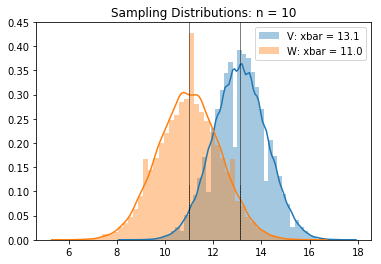

In [33]:
sns.distplot(sampling_dist_V, label='V: xbar = {}'.format(np.mean(V)))
sns.distplot(sampling_dist_W, label='W: xbar = {}'.format(np.mean(W)))

plt.title("Sampling Distributions: n = 10")
# plt.text(600, .004, r'$\mu={},\ \sigma={}$'.format(round(mu, 2), round(stdev, 2)))
plt.axvline(x=np.mean(sampling_dist_V), linestyle='-', color='k',linewidth=.5 )
plt.axvline(x=np.mean(sampling_dist_W), linestyle='-', color='k',linewidth=.5, ymax=1 )

plt.axvline(x=np.mean(W), linestyle='--', color='k',linewidth=.5, ymax=.25 )
plt.axvline(x=np.mean(V), linestyle='--', color='k',linewidth=.5, ymax=.25 )
plt.legend()

Can we parallelize this computation?

In [34]:

     
# # what are your inputs, and what operation do you want to 
# # perform on each input. For example...
# inputs = range(10) 
# def processInput(i):
#     return i * i
 
# num_cores = multiprocessing.cpu_count()
     
# results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)


# num_cores = multiprocessing.cpu_count()
# nr_of_iterations = 100000
# sampling_dist_V = []
# sampling_dist_W = []
# def GetSampleDistribution(sampling_dist_V, sampling_dist_W):
#     W1, V1 = create_sample()
#     sampling_dist_V.append(np.mean(V1))
#     sampling_dist_W.append(np.mean(W1))
#     return sampling_dist_V, sampling_dist_W

# sampling_dist_V, sampling_dist_W = Parallel(n_jobs=num_cores)(delayed(GetSampleDistribution)(sampling_dist_V, sampling_dist_W) for i in range(nr_of_iterations))



**Now lets talk about Distributions!**

![title](Distributions.png)

Binomial Distribution

In [35]:
p = .6
n = 100
nr_iterations = 1000000

In [36]:
rand.random()

0.8979186402604693

In [37]:
nr_successes_per_trial = []
for iterations in range(nr_iterations):
    trial_outcomes = np.sum([int(rand.random() > p) for i in range(n)])
    nr_successes_per_trial.append(trial_outcomes)

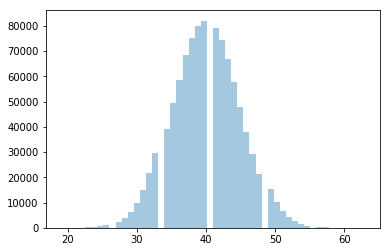

In [38]:
sns.distplot(nr_successes_per_trial, kde=False )

(array([2.00000e+00, 3.00000e+00, 8.00000e+01, 3.67000e+02, 2.69500e+03,
        6.78700e+03, 3.23350e+04, 5.06730e+04, 1.43589e+05, 1.41420e+05,
        1.60699e+05, 2.23212e+05, 1.07849e+05, 9.04000e+04, 2.51710e+04,
        1.22910e+04, 1.87500e+03, 5.18000e+02, 3.20000e+01, 2.00000e+00]),
 array([34.  , 36.45, 38.9 , 41.35, 43.8 , 46.25, 48.7 , 51.15, 53.6 ,
        56.05, 58.5 , 60.95, 63.4 , 65.85, 68.3 , 70.75, 73.2 , 75.65,
        78.1 , 80.55, 83.  ]),
 <a list of 20 Patch objects>)

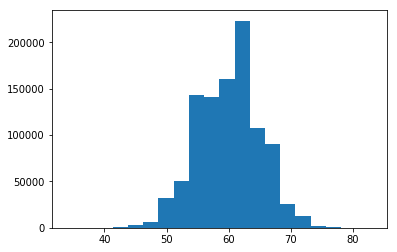

In [39]:
binomial_sim = st.binom.rvs(n = 100, p=.6, size=1000000)
plt.hist(binomial_sim, bins=20)

What is the probablity of getting less than x successes?

In [40]:
sum(np.array(nr_successes_per_trial) < 30)/len(nr_successes_per_trial)

0.014788

**Binomial Formula**

f(x) = $\binom{n}{x}$$p^x$$(1-p)^{n-x}$


In [41]:
binomial = st.binom.cdf(30, 100, .6)
binomial

1.2514775349158629e-09

In [42]:
st.binom.pmf(30, 100, .6)

9.050559931901585e-10

**Geometric distribution** - what is the first success<br/>
$f(x) = p(1-p)^{x-1}$

**Hypergeometric distribution** - Sampling without replacement<br/>

**Poisson Distribution**<br/>

P(X=k) = $e^\lambda *  {\frac{\lambda^k}{k!}}$<br/>
$\lambda$ = avg time between events

<br/>3 Assumptions<br/>
1. Events are independent of each other. The occurrence of one event does not affect the probability another event will occur.
2. The average rate (events per time period) is constant.
3. Two events cannot occur at the same time.


In [43]:
lamb_da = 5
n = np.arange(0, 50)

In [44]:
y = st.poisson.pmf(n, lamb_da)

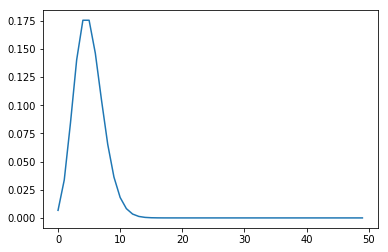

In [45]:
plt.plot(y)

**Exponential Distribution**<br/>
f(x, $\lambda$) = $\lambda$$e^{-\lambda x}$
<br/>This is useful for modeling time between events. For example, time between reservations, we could monitor the time until the next reservation and if the time since the last one gets beyond some threshold then we could alert to investigate if something is wrong

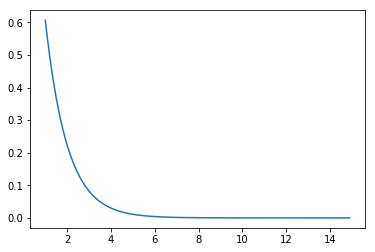

In [46]:
lamb_da = 0.5
x = np.arange(1, 15, .1)
y = st.expon.pdf(x, lamb_da)
plt.plot(x, y)

Regression

List of data sets:
https://docs.google.com/spreadsheets/d/1ZtrKDFFIkoUt4YDq8tX1Vup8pnhb1JjwVjafgVG_U28/edit?usp=sharing

In [76]:
!curl -O https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/StrikeDur.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: strike_dur.csv


In [345]:
# data = pd.read_csv("visitsomerville.csv")

In [346]:
# data = data.drop(columns=['Unnamed: 0'])

In [347]:
# data['visits'].hist()

In [348]:
# strike_model = ols("gdp ~ dur", data=data).fit()

In [349]:
# print(strike_model.summary())

In [350]:
# fig, ax = plt.subplots(figsize=(12, 8))
# fig = sm.graphics.plot_fit(strike_model, "dur", ax=ax)

In [351]:
# fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(strike_model, "dur", fig=fig)

In [352]:
# fig, ax = plt.subplots(figsize=(12,8))
# fig = sm.graphics.influence_plot(strike_model, ax=ax, criterion="cooks")

Regression: Make my own dataset

In [641]:
def random_number(weight):
    if rand.random() > weight:
        return 1
    else:
        return 0
    
def e(low_range, up_range):
    return rand.randint(rand.randint(low_range, 0), rand.randint(0, up_range))

def GetBinaryBasedOnY(y):
    if y < 50:
        return random_number(.99)
    else:
        return random_number(.01)

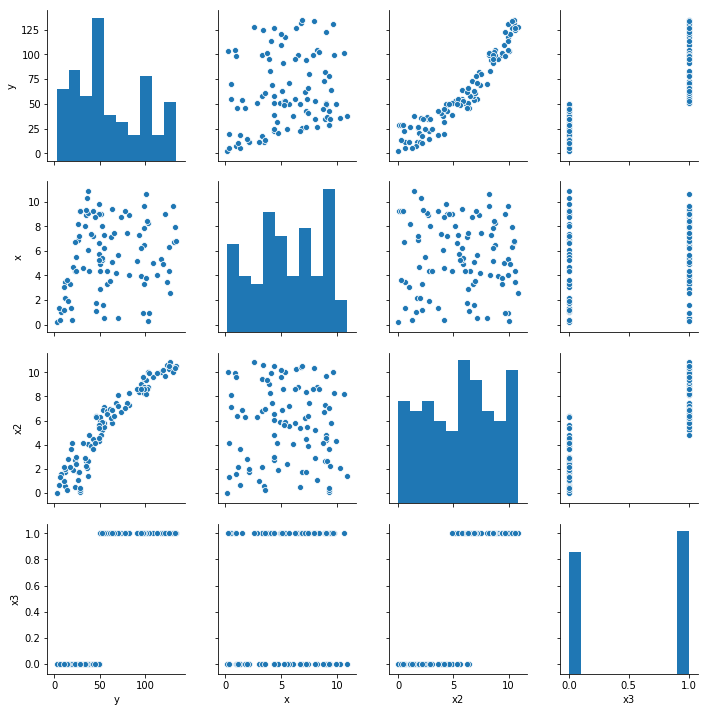

In [642]:
length = 100


x = np.array([rand.randint(0, 10) + round(rand.random(), 4) for i in range(length)])
x2 = np.array([rand.randint(0, 10) + round(rand.random(), 4) for i in range(length)])
# x3 = np.array([GetBinaryBasedOnY(i) for i in range(length)])

# y = [2 + 3*x[i] + x2[i]**2 + x3[i] + e(-10, 10) for i in range(length)]
y = [2 + 3*x[i] + x2[i]**2 + e(-1, 1) for i in range(length)]
randomModelData = pd.DataFrame({'y': y
                                ,'x': x 
                               , 'x2': x2
#                                 , 'x3': x3
                               })

randomModelData['x3'] = randomModelData.y.apply(GetBinaryBasedOnY)

sns.pairplot(randomModelData)

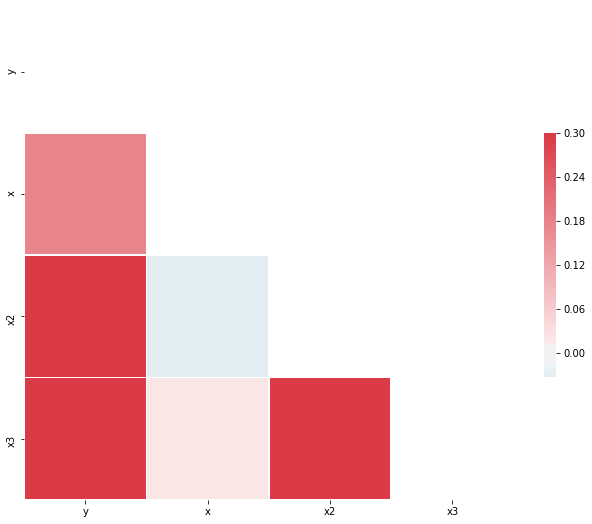

In [643]:
corr = randomModelData.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.112e+05
Date:                Wed, 27 Mar 2019   Prob (F-statistic):          8.24e-170
Time:                        06:23:05   Log-Likelihood:                -94.513
No. Observations:                 100   AIC:                             197.0
Df Residuals:                      96   BIC:                             207.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7901      0.159     11.233      0.0

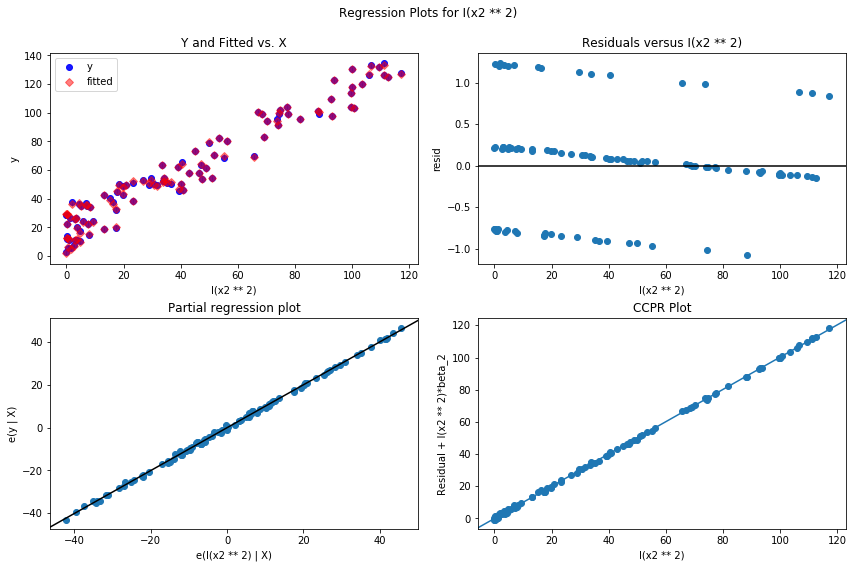

In [645]:
randomDataModel = ols(formula = 'y ~ x + I(x2**2) + x3', data = randomModelData).fit()
print(randomDataModel.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(randomDataModel, "I(x2 ** 2)", fig=fig)


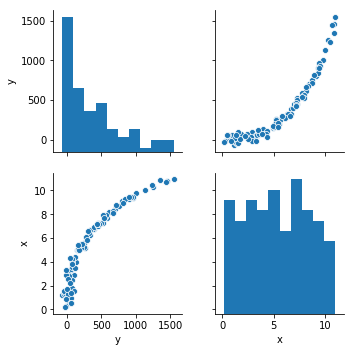

In [683]:
x = np.array([rand.randint(0, 10) + round(rand.random(), 4) for i in range(length)])
# x2 = np.array([rand.randint(0, 10) + round(rand.random(), 4) for i in range(length)])

y = [2 + 3*x[i] + x[i]**2 + x[i]**3 + e(-100, 100) for i in range(length)]
randomModelData = pd.DataFrame({'y': y
                                ,'x': x 
                               })
sns.pairplot(randomModelData)

In [656]:
corr = randomModelData.corr()
corr

,y,x
y,1.000000,0.927698
x,0.927698,1.000000


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     605.1
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           1.01e-43
Time:                        06:43:37   Log-Likelihood:                -651.59
No. Observations:                 100   AIC:                             1307.
Df Residuals:                      98   BIC:                             1312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -344.1393     34.858     -9.873      0.0

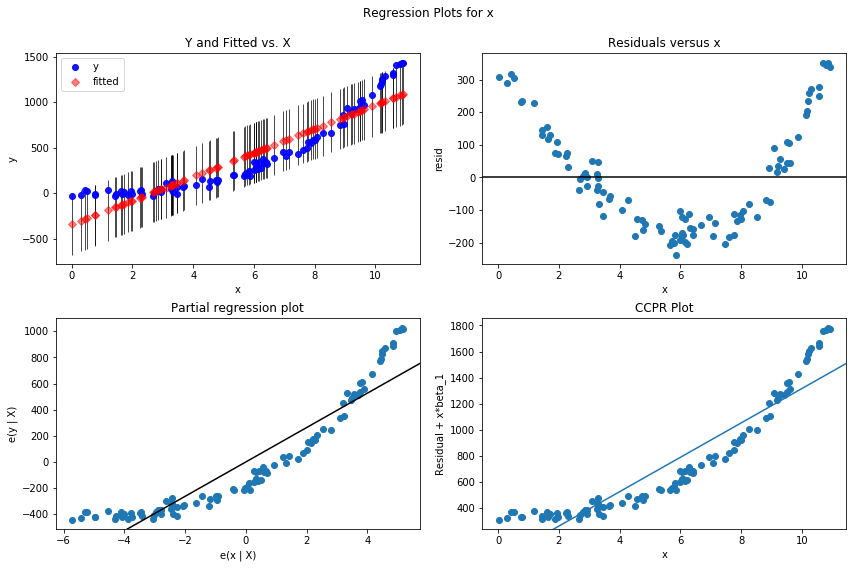

In [681]:
randomDataModel = ols(formula = 'y ~ x', data = randomModelData).fit()
print(randomDataModel.summary())
print("MSE_resid: ", randomDataModel.mse_resid)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(randomDataModel, "x", fig=fig)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.542e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):          1.32e-109
Time:                        06:42:59   Log-Likelihood:                -496.87
No. Observations:                 100   AIC:                             997.7
Df Residuals:                      98   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5827      4.748      3.071      0.0

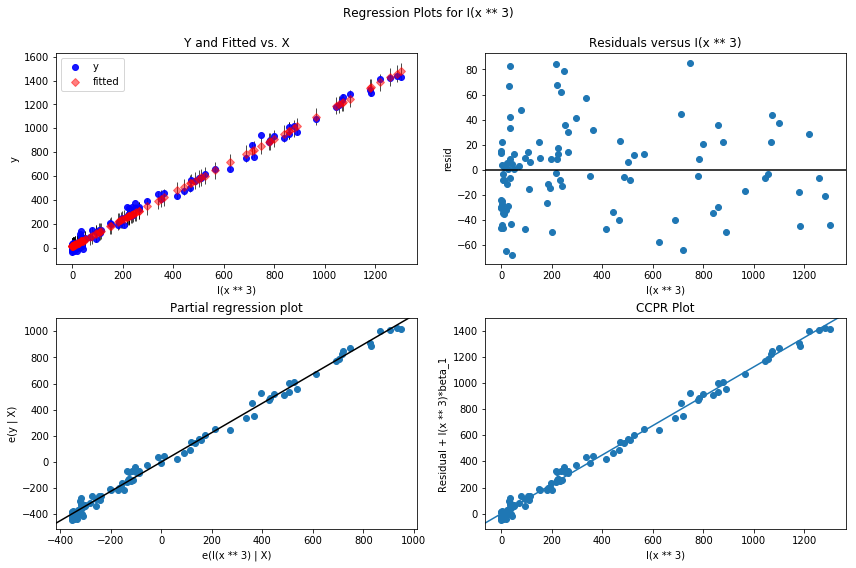

In [679]:
randomDataModel = ols(formula = 'y ~ I(x**3)', data = randomModelData).fit()
print(randomDataModel.summary())
print("MSE_resid: ", randomDataModel.mse_resid)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(randomDataModel, "I(x ** 3)", fig=fig)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.994    
Dependent Variable: y                AIC:                993.8963 
Date:               2019-03-27 06:43 BIC:                1004.3170
No. Observations:   100              Log-Likelihood:     -492.95  
Df Model:           3                F-statistic:        5450.    
Df Residuals:       96               Prob (F-statistic): 4.71e-107
R-squared:          0.994            Scale:              1166.7   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept    -13.9782   16.1934  -0.8632  0.3902  -46.1219  18.1655
x             11.0767   11.8001   0.9387  0.3502  -12.3462  34.4996
I(x ** 2)     -0.6489    2.3951  -0.2709  0.7870   -5.4031   4.1052
I(x ** 3)      1.1029    0.1397   7.8953  0.0000    0.8256   1.3802
------

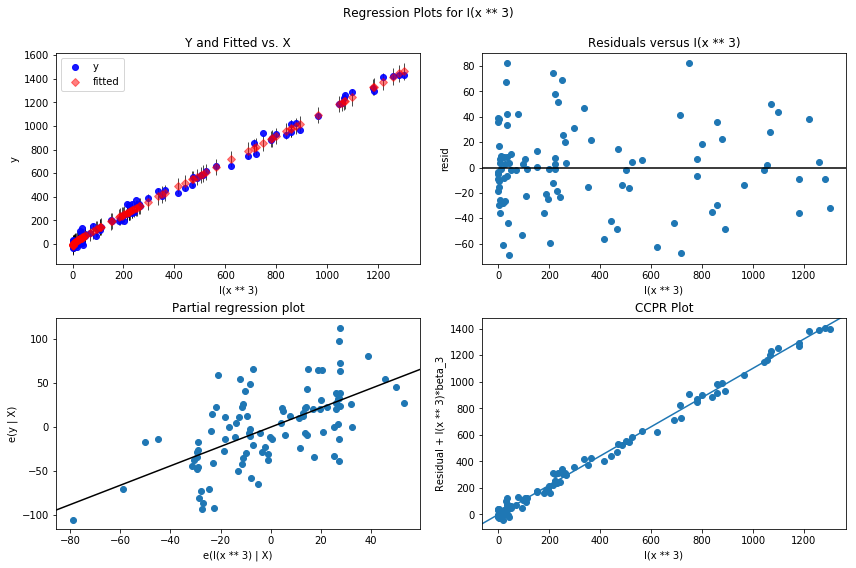

In [680]:
randomDataModel = ols(formula = 'y ~ x + I(x**2) + I(x**3)', data = randomModelData).fit()
print(randomDataModel.summary2())
print("MSE_resid: ", randomDataModel.mse_resid)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(randomDataModel, "I(x ** 3)", fig=fig)

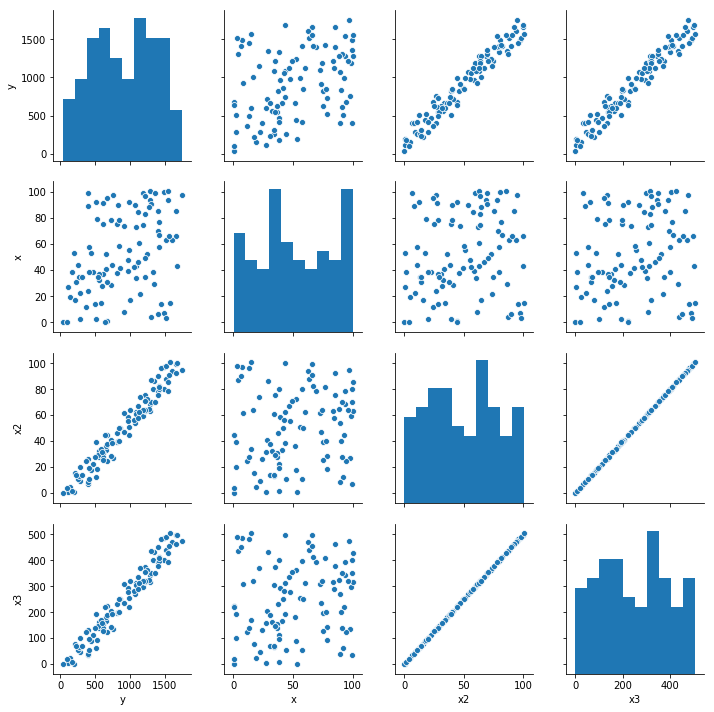

In [701]:
x = np.array([rand.randint(0, 100) + round(rand.random(), 4) for i in range(length)])
x2 = np.array([rand.randint(0, 100) + round(rand.random(), 4) for i in range(length)])
x3 = np.array([i*5 for i in x2])

y = [5 + 3*x[i] + 10*x2[i] + x3[i] + e(-100, 100) for i in range(length)]
randomModelData = pd.DataFrame({'y': y
                                ,'x': x
                                , 'x2': x2
                                , 'x3': x3
                               })
sns.pairplot(randomModelData)

In [704]:
randomModelData.corr()

,y,x,x2,x3
y,1.000000,0.351735,0.974630,0.974630
x,0.351735,1.000000,0.148926,0.148926
x2,0.974630,0.148926,1.000000,1.000000
x3,0.974630,0.148926,1.000000,1.000000


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.984    
Dependent Variable: y                AIC:                1000.3403
Date:               2019-03-27 06:55 BIC:                1008.1558
No. Observations:   100              Log-Likelihood:     -497.17  
Df Model:           2                F-statistic:        3026.    
Df Residuals:       97               Prob (F-statistic): 4.03e-88 
R-squared:          0.984            Scale:              1256.4   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      16.0769   10.9617   1.4666  0.1457  -5.6791  37.8329
x               2.9210    0.1322  22.0903  0.0000   2.6586   3.1834
x2              9.9514    0.1319  75.4281  0.0000   9.6895  10.2132
------------------------------------------------------------------
Omnibus

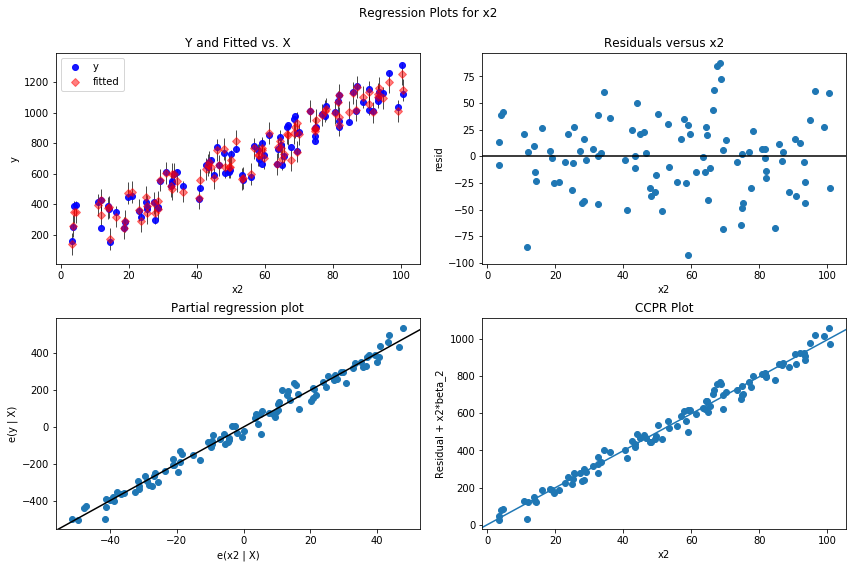

In [699]:
randomDataModel = ols(formula = 'y ~ x + x2 ', data = randomModelData).fit()
print(randomDataModel.summary2())
print("MSE_resid: ", randomDataModel.mse_resid)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(randomDataModel, "x2", fig=fig)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.993    
Dependent Variable: y                AIC:                1009.5707
Date:               2019-03-27 07:20 BIC:                1017.3862
No. Observations:   100              Log-Likelihood:     -501.79  
Df Model:           2                F-statistic:        7471.    
Df Residuals:       97               Prob (F-statistic): 5.79e-107
R-squared:          0.994            Scale:              1377.9   
-------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     2.2344    9.1531    0.2441  0.8077  -15.9320  20.4008
x             3.1330    0.1223   25.6208  0.0000    2.8903   3.3757
x2            0.5739    0.0050  114.3762  0.0000    0.5640   0.5839
x3            2.8696    0.0251  114.3762  0.0000    2.8198   2.9194
------

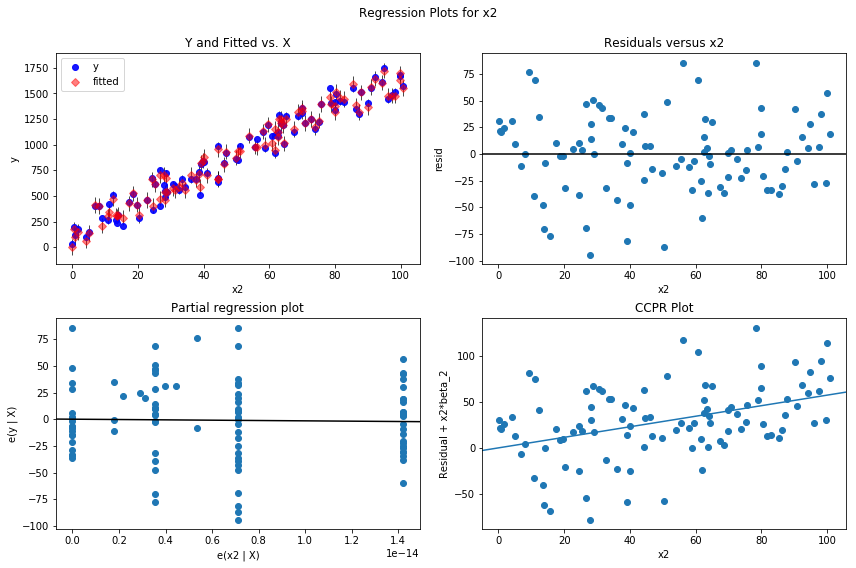

In [715]:
randomDataModel = ols(formula = 'y ~ x + x2 + x3', data = randomModelData).fit()
print(randomDataModel.summary2())
print("MSE_resid: ", randomDataModel.mse_resid)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(randomDataModel, "x2", fig=fig)

# Computers

In [48]:
df = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Computers.csv")
df = df.drop(columns='Unnamed: 0')
display(HTML('https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Computers.html'))

Computers,R Documentation


In [49]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [50]:
 def YesNo(answer):
    if answer == 'yes':
        return 1
    else:
        return 0
    

df[['cd', 'multi', 'premium']] = df[['cd', 'multi', 'premium']].applymap(YesNo)

In [51]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


In [52]:
df.describe()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [53]:
df.groupby('ram').screen.count()

ram
2      394
4     2236
8     2320
16     996
24     297
32      16
Name: screen, dtype: int64

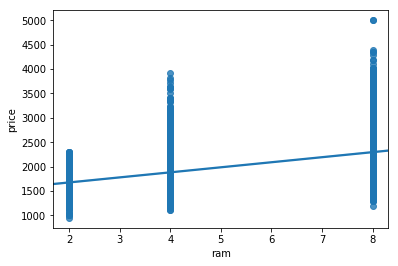

In [54]:
data_temp = df[df['ram'] <16]
x = data_temp.ram
y = data_temp.price
sns.regplot(x, y);

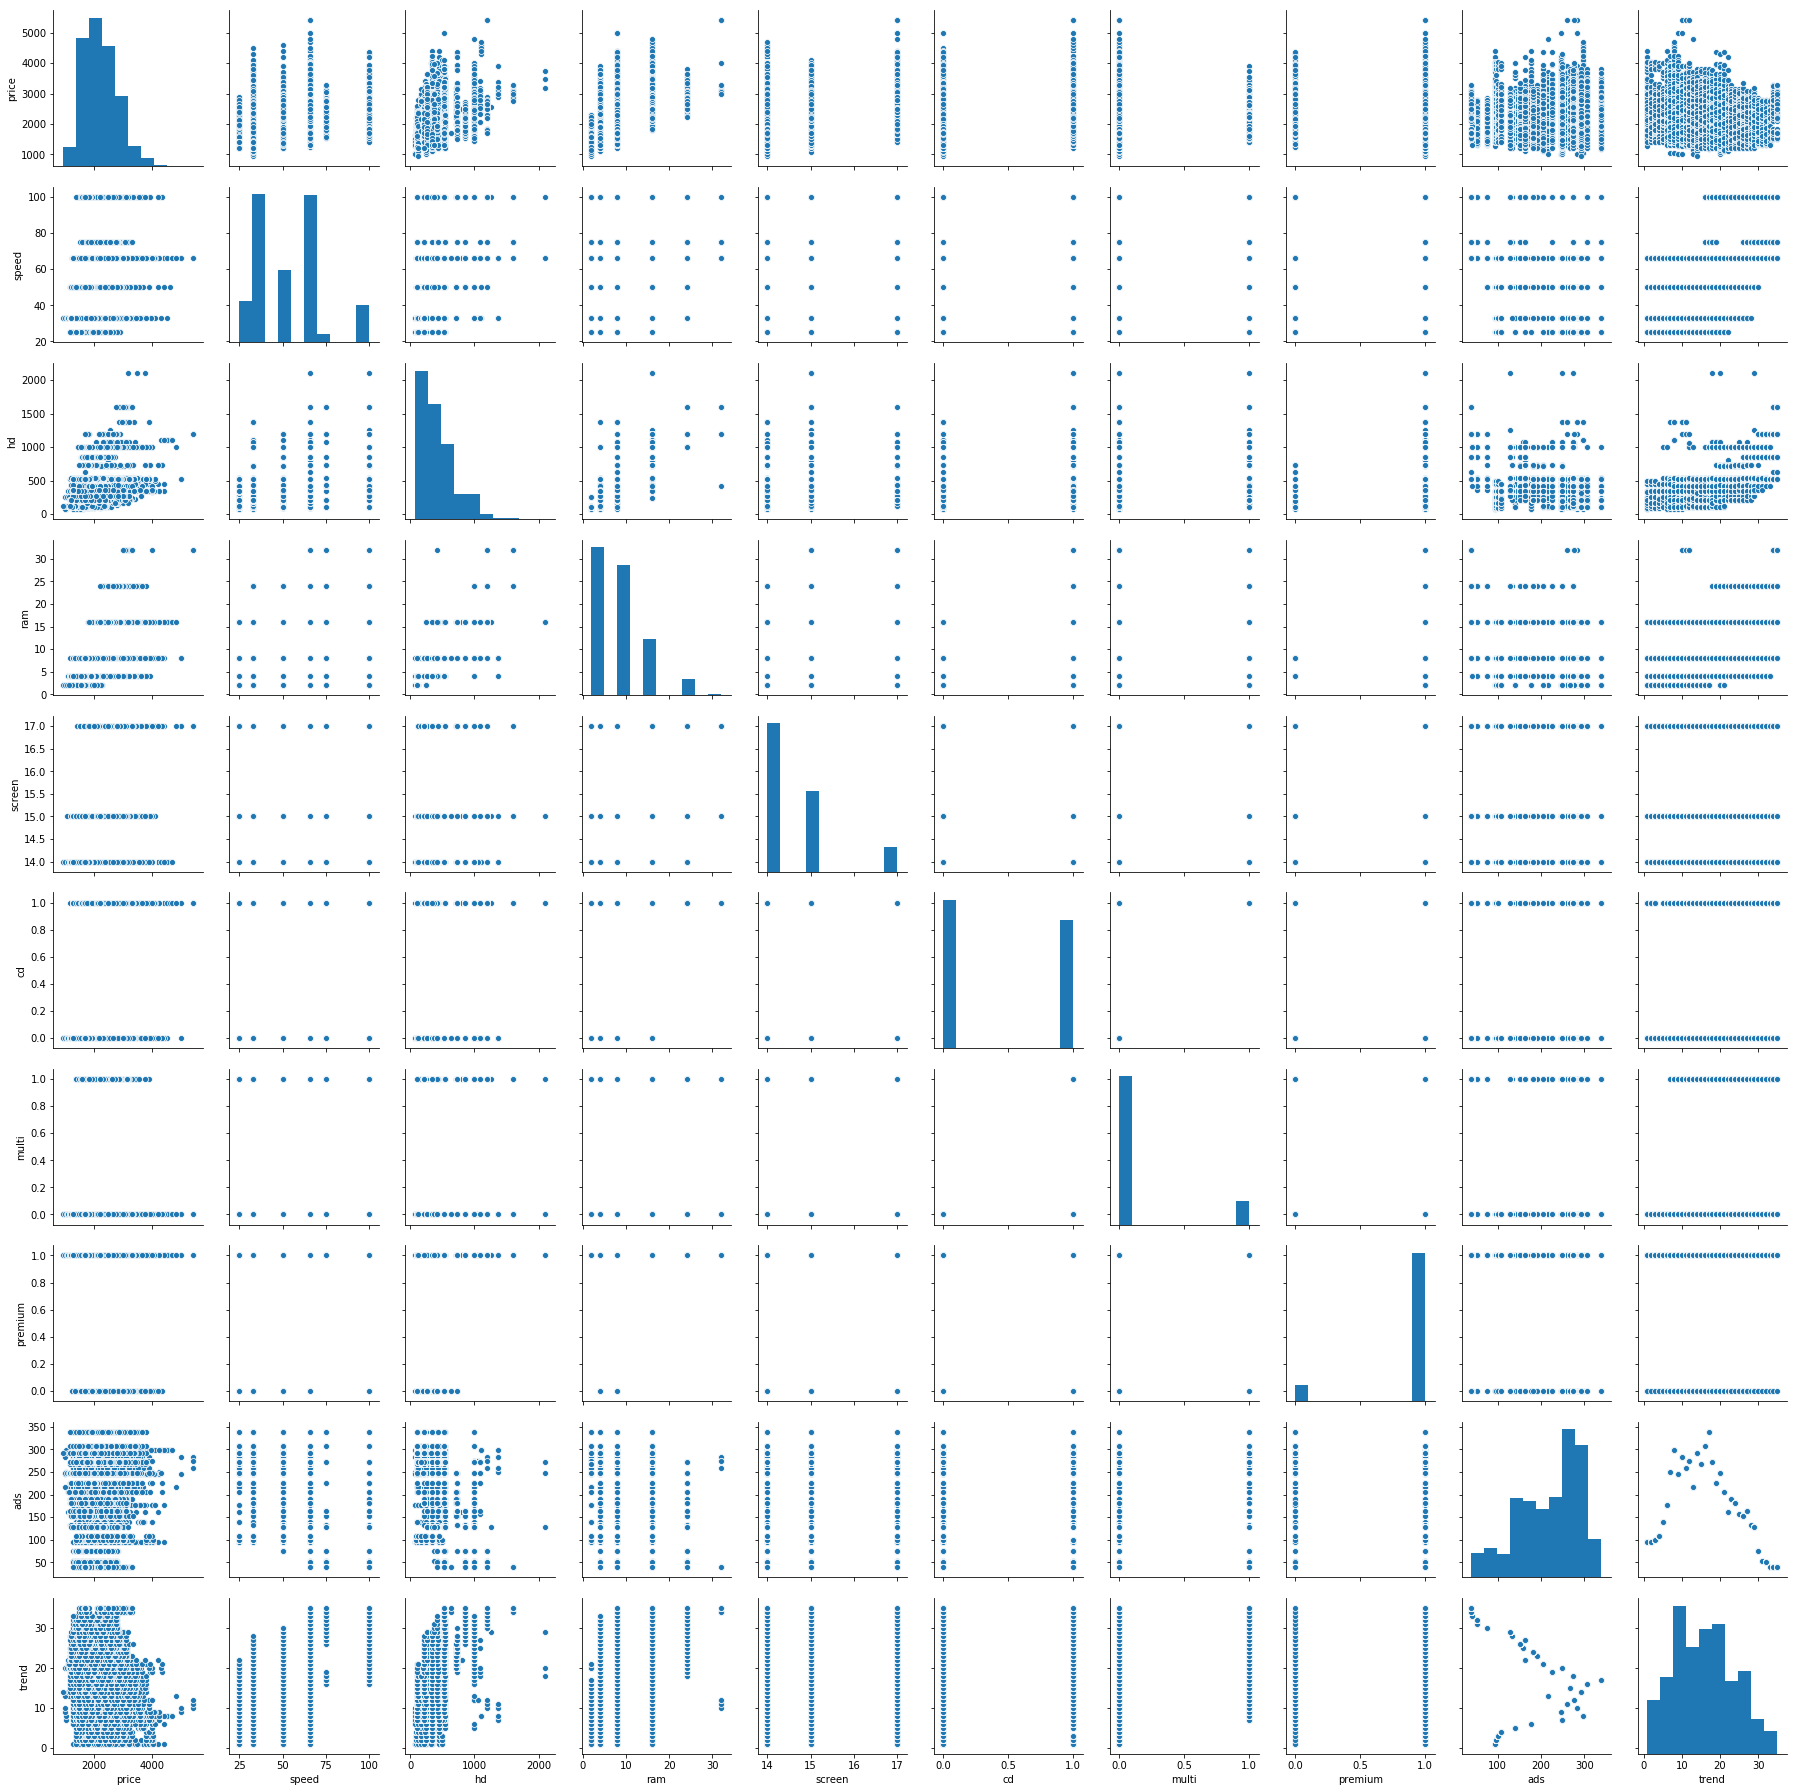

In [55]:
sns.pairplot(df)

In [162]:
test = df2[['trend', 'ads']]

/Users/will/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


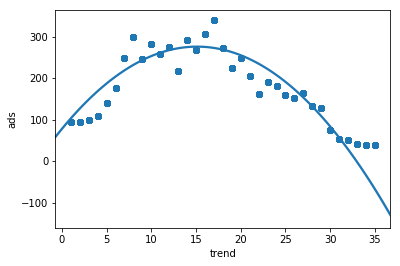

In [163]:
sns.regplot(df2.trend, df2.ads, order=2)

In [56]:
df2 = df.merge(pd.get_dummies(df['screen']).rename(columns={14:'small_screen'
                                            , 15: 'med_screen'
                                            , 17: 'large_screen'
                                            }), left_index=True, right_index=True).drop(columns='screen')

In [57]:
df3 = df2.drop(columns = 'med_screen')

In [58]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


In [59]:
pd.options.display.float_format = '{:,.2f}'.format

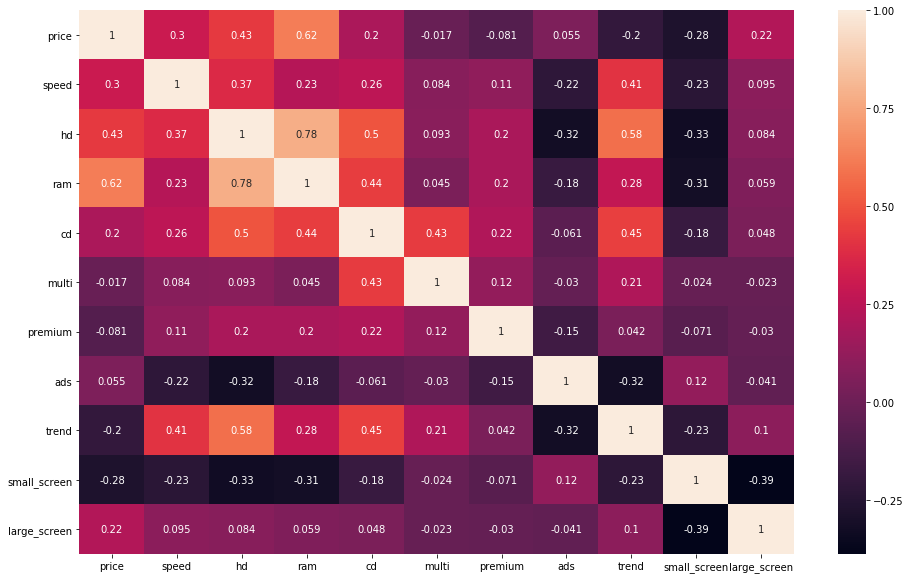

In [60]:
plt.figure(figsize=(16,10))
sns.heatmap(df3.corr(), annot=True)
plt.show()

/Users/will/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


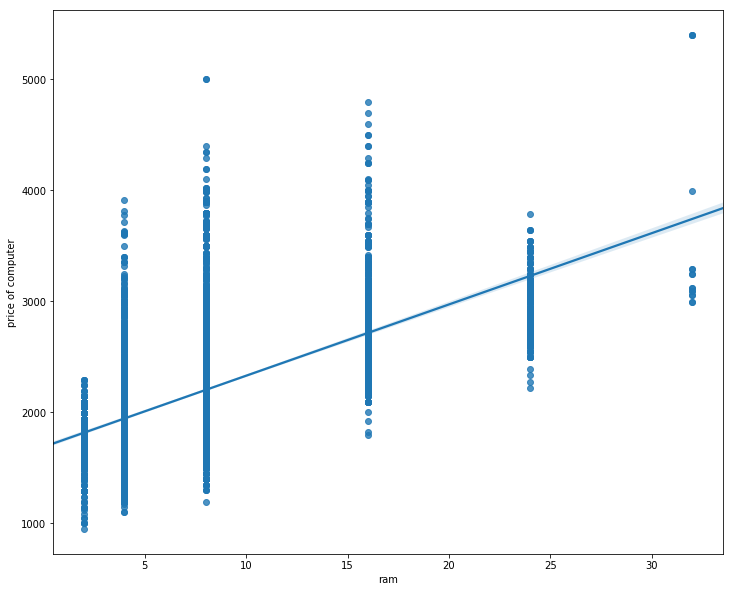

1687.292536697255 64.23162668334776


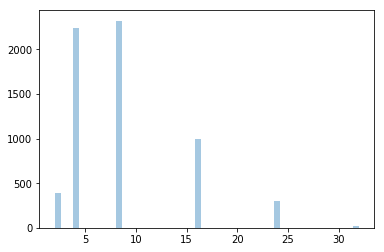

In [98]:
x_label = 'ram'

X = df[x_label].values.reshape(-1,1)
y = df['price'].values

model = LinearRegression()
model.fit(X, y)
coef = model.coef_
intercept = model.intercept_

plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel(x_label)
plt.ylabel("price of computer")
plt.show()
print(intercept, coef[0])
sns.distplot(X, kde=False)

In [63]:
coef

array([64.23162668])

In [64]:
intercept

1687.292536697255

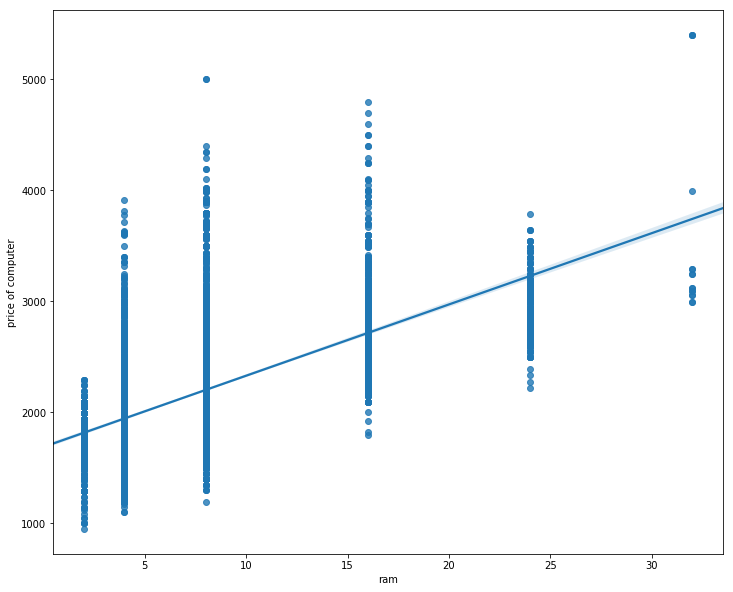

/Users/will/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


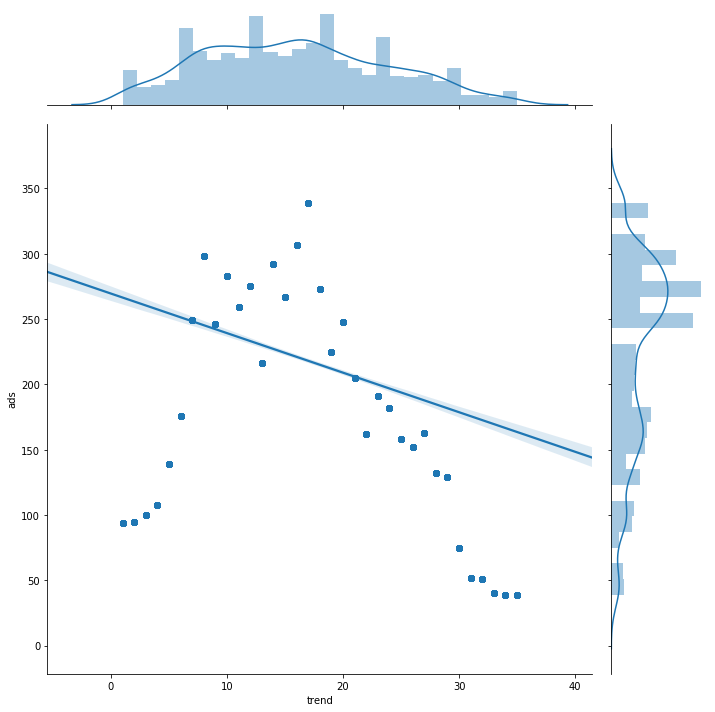

In [99]:
sns.jointplot(x='trend', y='ads', data=df, kind='reg', size=10);
plt.show();

In [67]:
X = df['ram'].values.reshape(-1,1)
# X = df.iloc[:, :-1].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

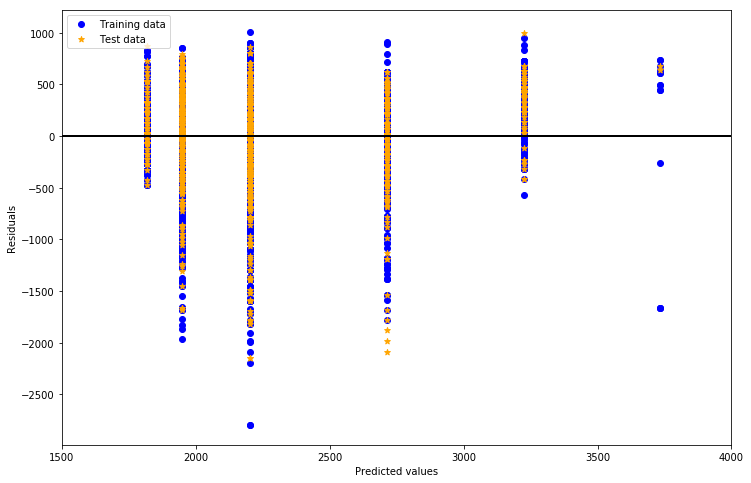

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=5000, lw=2, color='k')
plt.xlim([1500, 4000])
plt.show()

In [69]:
# corr = df.corr()
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [160]:
model = ols(formula = 'price ~ speed + hd + ram + screen + cd + multi + premium + ads + trend + I(trend*ads) ', data = df).fit()
# model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(df.drop(columns='price'))
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     2179.
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        07:06:03   Log-Likelihood:                -44018.
No. Observations:                6259   AIC:                         8.806e+04
Df Residuals:                    6248   BIC:                         8.813e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        412.0544     62.179      6.

In [96]:
model = ols(formula = 'price ~ speed + hd + ram + cd + multi + premium + ads + trend + small_screen + large_screen ', data = df3).fit()
# model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(df3.drop(columns='price'))
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2214.
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        06:39:15   Log-Likelihood:                -43978.
No. Observations:                6259   AIC:                         8.798e+04
Df Residuals:                    6248   BIC:                         8.805e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2070.1147     22.987     90.056   

In [118]:
model = ols(formula = 'price ~ speed +  ram  + multi + premium + ads + trend + small_screen + large_screen ', data = df3).fit()
# model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(df3.drop(columns='price'))
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     2305.
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        06:53:59   Log-Likelihood:                -44416.
No. Observations:                6259   AIC:                         8.885e+04
Df Residuals:                    6250   BIC:                         8.891e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2028.7825     23.956     84.687   

In [119]:
print("RSME: ",  sm.tools.eval_measures.rmse(y_pred, df3.price))
print("MeanABS: ", sm.tools.eval_measures.meanabs(y_pred, df3.price))


RSME:  292.18881367258984
MeanABS:  212.0561632739855


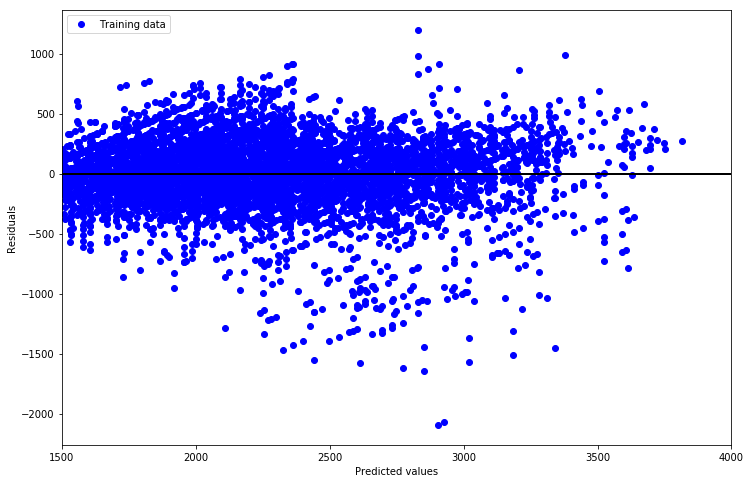

In [120]:
residuals = y_pred - df3.price
plt.figure(figsize=(12,8))
plt.scatter(y_pred, residuals, c='blue', marker='o', label='Training data')
# plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=5000, lw=2, color='k')
plt.xlim([1500, 4000])
plt.show()

In [74]:
df3['residuals'] = residuals
df3['prediction'] = y_pred

In [116]:
df3[(df3['residuals'] < -1500) | (df3['residuals'] > 1000)]


,price,speed,hd,ram,cd,multi,premium,ads,trend,small_screen,large_screen,residuals,prediction
79,1629,25,80,8,0,0,0,94,1,1,0,"1,102.91","2,731.91"
1440,4999,66,525,8,0,0,1,246,9,0,1,"-1,944.09","3,054.91"
1700,4999,66,525,8,1,0,1,283,10,0,1,"-1,912.68","3,086.32"
4846,2390,50,1000,24,1,0,1,162,22,0,1,"1,013.75","3,403.75"


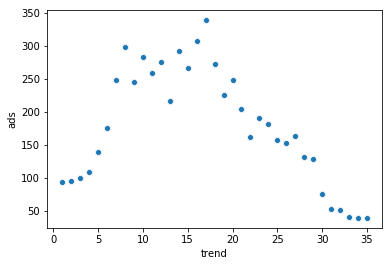

In [117]:
sns.scatterplot(x=df3.trend, y=df3.ads)

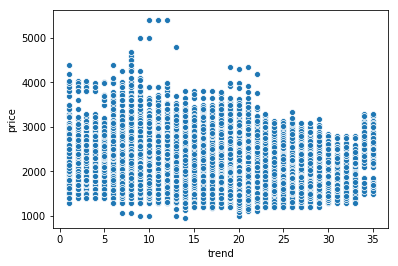

In [77]:
sns.scatterplot(x=df3.trend, y=df3.price)

In [176]:
data = 'https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Schooling.csv'

df = pd.read_csv(data)
df = df.drop(columns='Unnamed: 0')
display(HTML('https://raw.github.com/vincentarelbundock/Rdatasets/master/doc/Ecdat/Schooling.html'))

Schooling,R Documentation


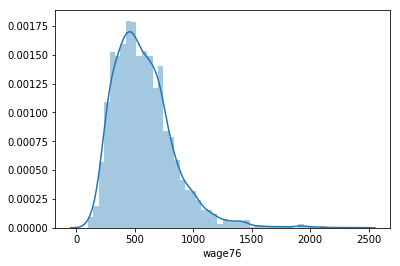

In [179]:
sns.distplot(df['wage76'])

/Users/will/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/will/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


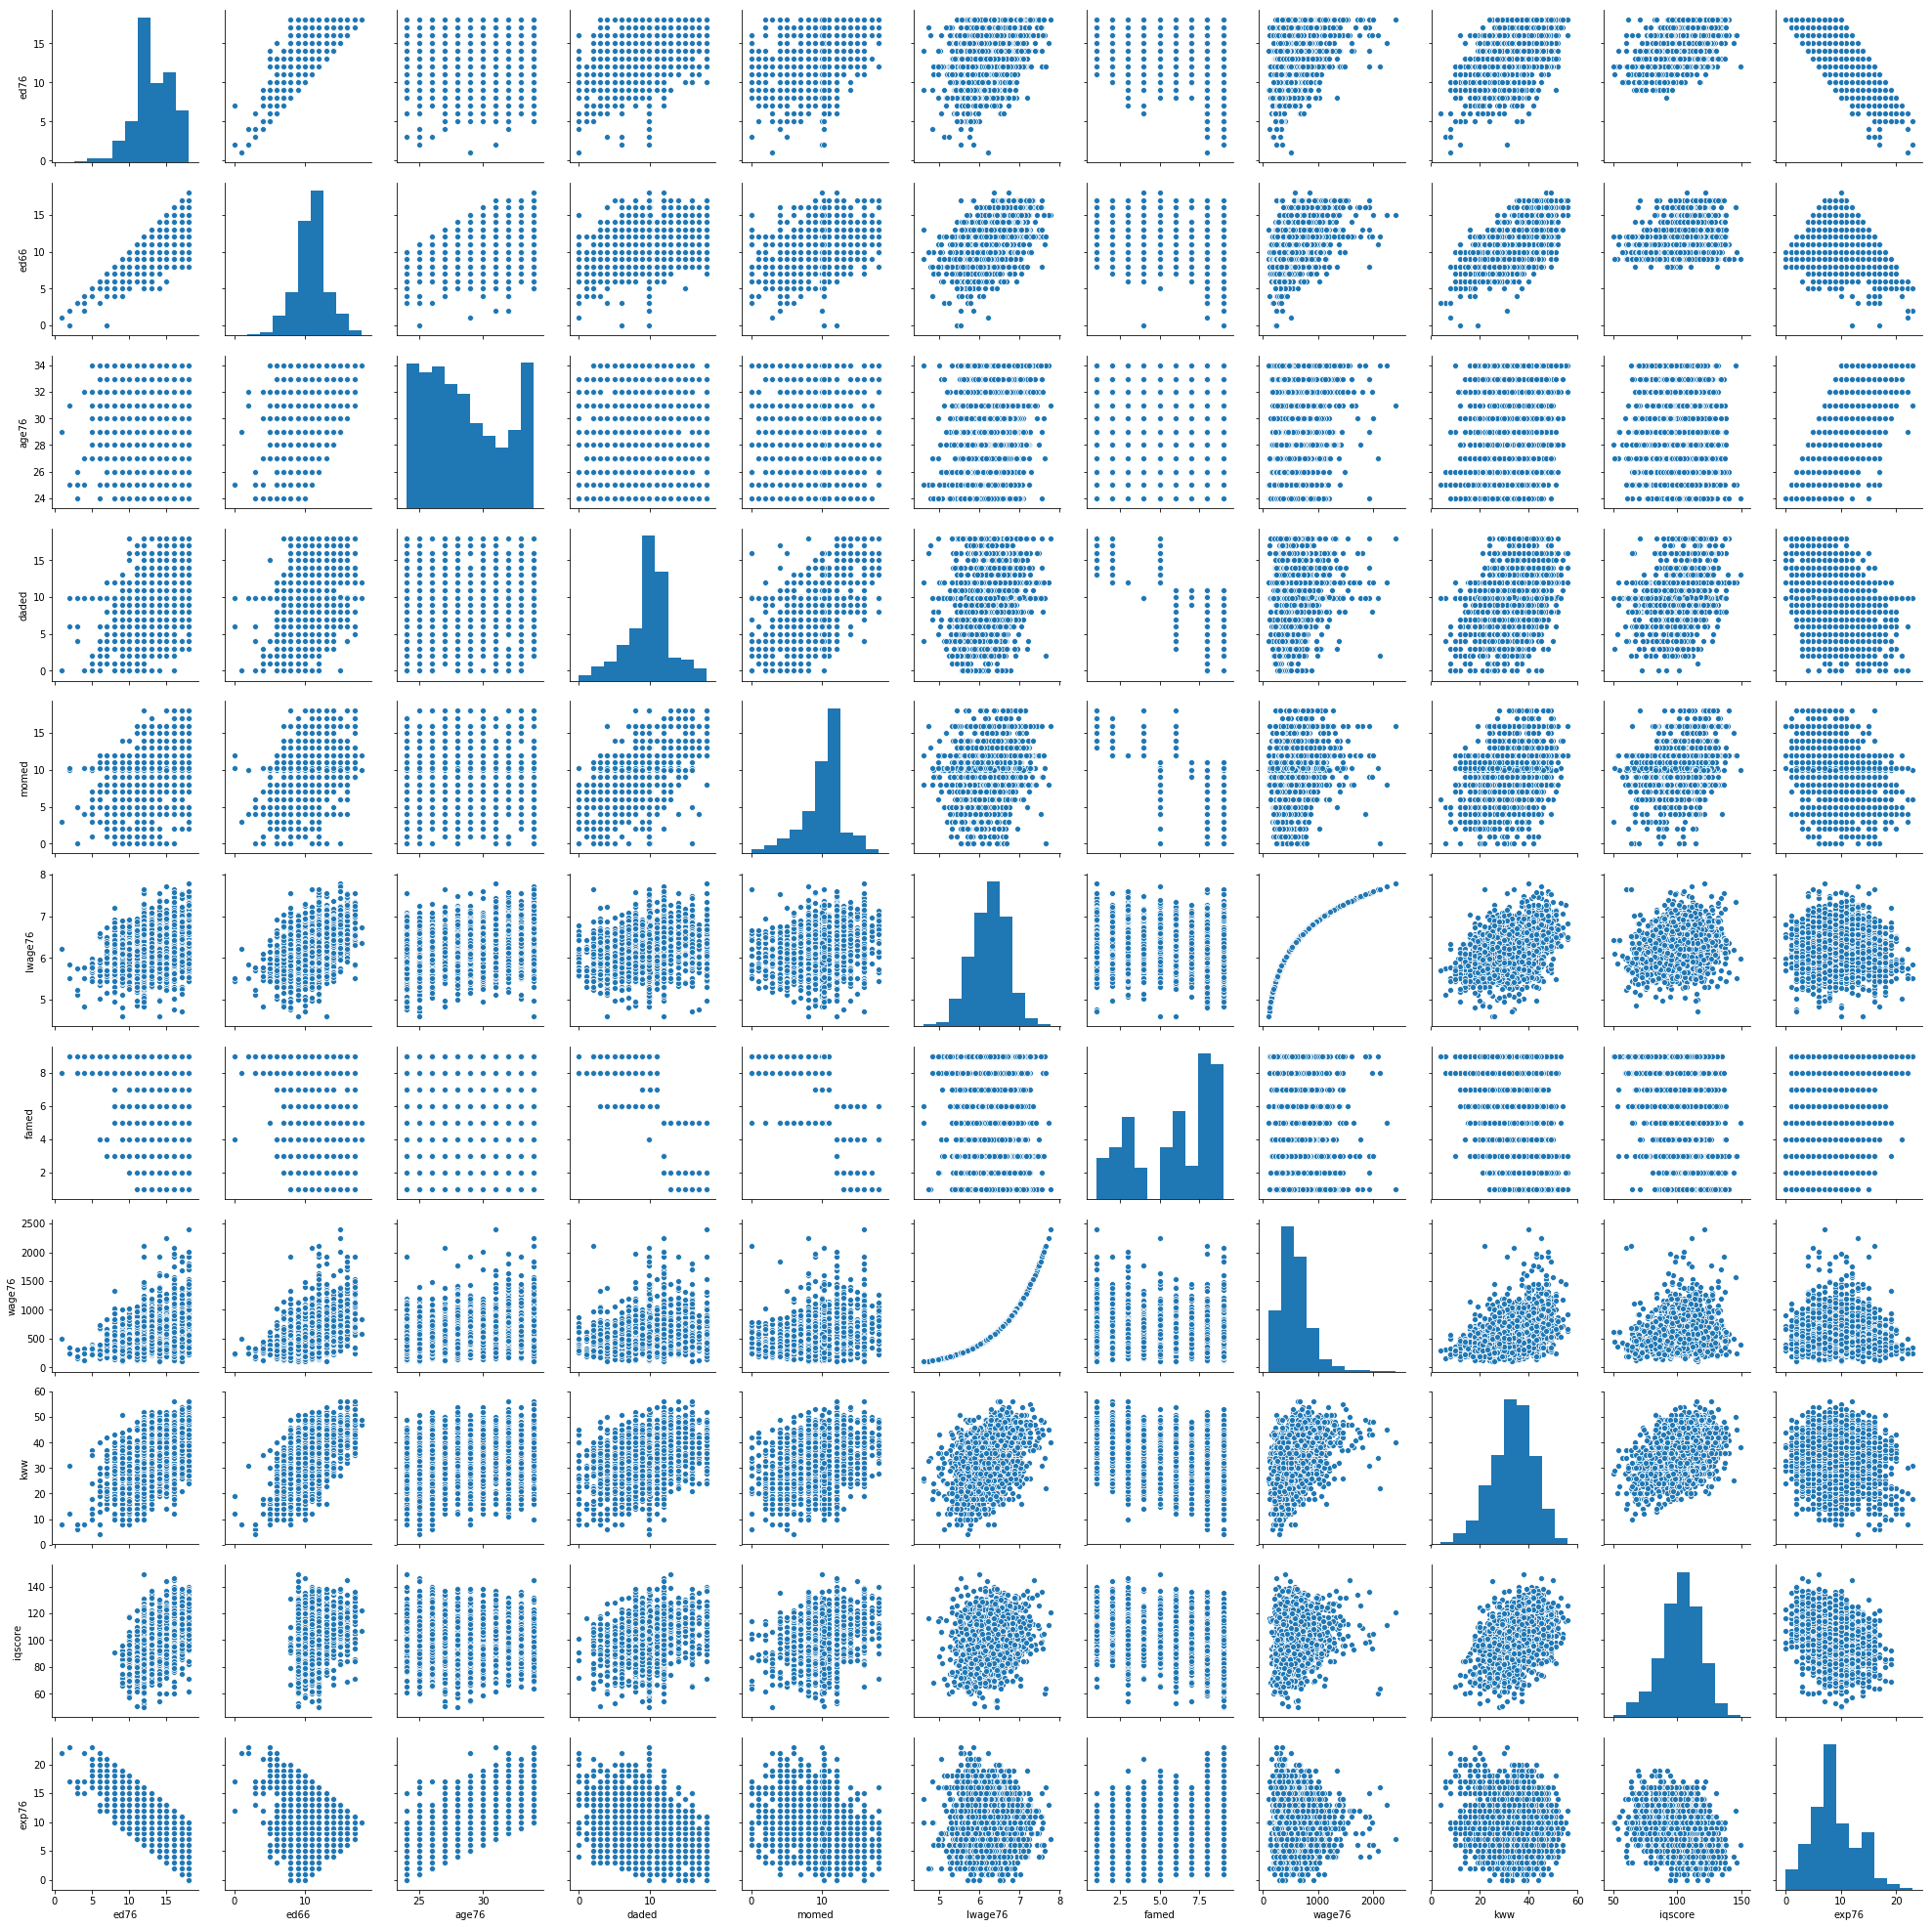

In [180]:
sns.pairplot(df)